# Working

In [1]:
import pandas as pd
import numpy as np


# Load the dataset
data = pd.read_excel('PQEvents_Ticket.xlsx')  

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum()) 

   id  SiteName   FeederId  EventId  Phase              First Event  \
0   1  Site0006  F_0000041     3042      4  2005-01-04 03:39:06.000   
1   2  Site0012  F_0000037     3048      3  2005-01-25 03:29:36.000   
2   3  Site0006  F_0000041     3067      2  2005-02-11 06:10:46.000   
3   4  Site0012  F_0000037     3127      2  2005-03-22 18:33:30.000   
4   6  Site0006  F_0000041     3152      2  2005-06-13 18:39:58.000   

                Last Event      Cause  Weather Isolation Equipment Code  \
0  2005-01-04 03:39:06.000  Equipment  Unknown                     Fuse   
1  2005-01-25 03:29:51.000  Equipment  Unknown                  Breaker   
2  2005-02-11 06:10:46.000    Weather     Wind                  Breaker   
3  2005-03-22 18:33:30.000  Equipment  Unknown                     Fuse   
4  2005-06-13 18:39:58.000  Equipment  Unknown                     Fuse   

  Failed Equipment Code                                 Details  
0                 Other          Equipment, Device UG, D

### TfidfVectorizer: This is not a machine learning model but a feature extraction method

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #converts a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which are useful for text classification tasks.
from sklearn.naive_bayes import MultinomialNB # for classification with discrete features (like word counts for text classification).
from sklearn.pipeline import make_pipeline # to create a pipeline that sequentially applies a list of transforms and a final estimator
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Text preprocessing: filtering rows with "Details" and "Cause" columns
data = data[['Details', 'Cause']].dropna() # removes any rows that contain missing values (NaN) 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['Details'], data['Cause'], test_size=0.2, random_state=42)

# Text vectorization=consider both unigrams (single words) and bigrams (two-word combinations) and model pipeline
model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), LogisticRegression(class_weight='balanced'))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

          Animal       1.00      0.67      0.80         3
Customer Request       1.00      0.50      0.67         2
       Equipment       0.75      0.82      0.78        11
       Lightning       0.83      1.00      0.91         5
            Tree       1.00      0.91      0.95        11
    Undetermined       1.00      1.00      1.00         4
         Unknown       0.86      0.86      0.86         7
         Vehicle       0.89      1.00      0.94         8
         Weather       1.00      1.00      1.00         1

        accuracy                           0.88        52
       macro avg       0.93      0.86      0.88        52
    weighted avg       0.89      0.88      0.88        52



In [115]:
def classify_ticket(details, model):
    # Predict the cause based on the provided ticket details
    predicted_cause = model.predict([details])
    return predicted_cause[0]

# Example ticket description
sample_details = "Customer reported flickering lights."
predicted_cause = classify_ticket(sample_details, model)

print(f"Sample Details: {sample_details}")
print(f"Predicted Cause: {predicted_cause}")


Sample Details: Customer reported flickering lights.
Predicted Cause: Equipment


# LDA
#### Latent Dirichlet Allocation (LDA) is a generative statistical model used primarily for topic modeling in natural language processing (NLP). =unsupervised learning technique

Topics: A topic is a collection of words that frequently occur together. Topics represent the underlying themes present in the documents. 


In [108]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import re

# Load the dataset (replace this with your actual data loading logic)
# Example: data = pd.read_csv('your_dataset.csv')

# Download the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocess the details text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    return tokens

# Apply preprocessing to the 'Details' column
data['processed_details'] = data['Details'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['processed_details'])
corpus = [dictionary.doc2bow(text) for text in data['processed_details']]

# Fit the LDA model
num_topics = 7  # Adjust this to the number of topics you want
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Calculate Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['processed_details'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

# Calculate Perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity: {perplexity}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.088*"primary" + 0.067*"caused" + 0.067*"tree" + 0.050*"outside" + 0.043*"lightning" + 0.040*"way" + 0.040*"right" + 0.036*"falllean" + 0.033*"recloser" + 0.025*"line"
Topic 1: 0.091*"ug" + 0.075*"equipment" + 0.069*"damaged" + 0.058*"cable" + 0.055*"fault" + 0.039*"caused" + 0.032*"connector" + 0.026*"line" + 0.021*"site" + 0.020*"event"
Topic 2: 0.147*"undetermined" + 0.059*"hit" + 0.059*"snake" + 0.058*"pole" + 0.052*"investigation" + 0.038*"car" + 0.030*"breaker" + 0.030*"truck" + 0.023*"weather" + 0.023*"related"
Topic 3: 0.083*"damaged" + 0.083*"oh" + 0.075*"motor" + 0.075*"vehicle" + 0.056*"ug" + 0.048*"pole" + 0.040*"contact" + 0.032*"equipment" + 0.032*"device" + 0.021*"site"
Topic 4: 0.051*"substation" + 0.048*"transformer" + 0.035*"outage" + 0.035*"tripped" + 0.034*"fault" + 0.028*"site" + 0.027*"f" + 0.025*"breaker" + 0.025*"causing" + 0.021*"lines"
Topic 5: 0.068*"tripped" + 0.067*"line" + 0.058*"storm" + 0.051*"event" + 0.050*"cause" + 0.047*"major" + 0.047*"con

In [119]:
# Sample input from the user
user_input = input("Enter the ticket details: ")

# Preprocess the input
preprocessed_input = preprocess_text(user_input)

# Convert the input into the same format as the training data
# Create a bag of words
bow_input = dictionary.doc2bow(preprocessed_input)

# Get the topic distribution for the input
topic_distribution = lda_model.get_document_topics([bow_input])

# Identify the dominant topic
dominant_topic = max(topic_distribution[0], key=lambda x: x[1])[0]

# Print the results
print(f"User Input: {user_input}")
print(f"Predicted Dominant Topic: {dominant_topic}")


Enter the ticket details: "High winds caused a branch to hit the transformer, leading to temporary power loss."
User Input: "High winds caused a branch to hit the transformer, leading to temporary power loss."
Predicted Dominant Topic: 6


# other Classifiers 

C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metr

                     Accuracy
Naive Bayes          0.730769
Decision Tree        0.884615
Random Forest        0.903846
Radial Basis SVM     0.884615
Neural Network       0.884615
K-Nearest Neighbors  0.826923
Logistic Regression  0.807692
Gradient Boosting    0.903846


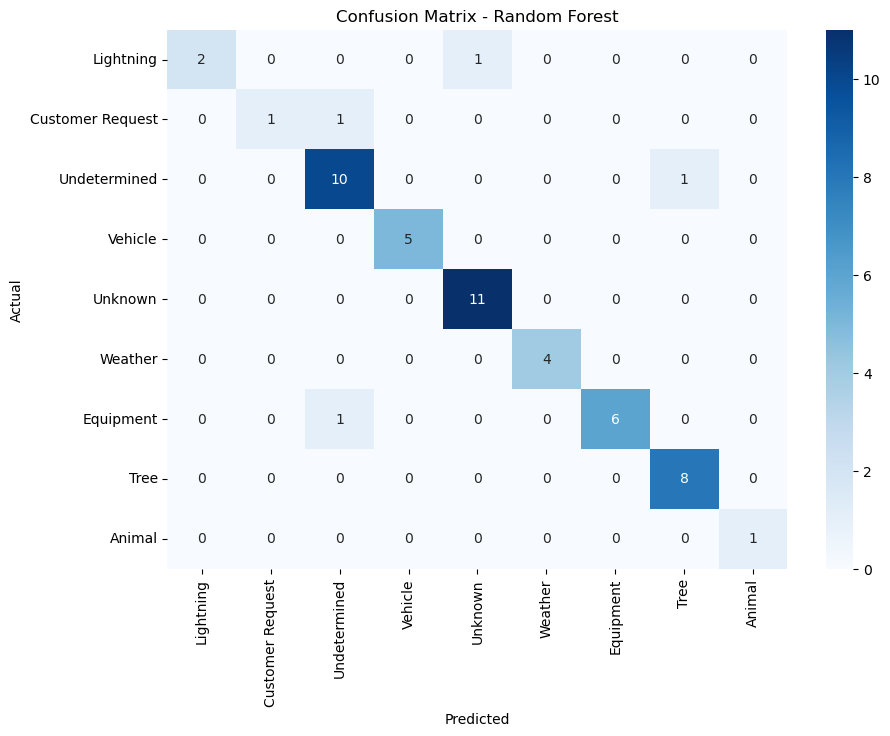

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Radial Basis SVM': SVC(kernel='rbf'),
    'Neural Network': MLPClassifier(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['accuracy']

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df)

# Generate confusion matrix for the best performing model (if needed)
best_model_name = max(results, key=results.get)  # Get model with highest accuracy
best_model_pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), models[best_model_name])
best_model_pipeline.fit(X_train, y_train)
y_pred_best = best_model_pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the Random Forest model
model = RandomForestClassifier()

# Create the pipeline
pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)


# Function to classify user input
def classify_ticket(ticket_description):
    prediction = pipeline.predict([ticket_description])
    return prediction[0]

# Sample user input
while True:
    user_input = input("Enter a ticket description (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predicted_cause = classify_ticket(user_input)
    print(f"Predicted Cause: {predicted_cause}")


Enter a ticket description (or 'exit' to quit): "Transformer failure causing power outage in Site0006; emergency crew dispatched."
Predicted Cause: Equipment
Enter a ticket description (or 'exit' to quit): quit
Predicted Cause: Undetermined
Enter a ticket description (or 'exit' to quit): exit


# Clustering

C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

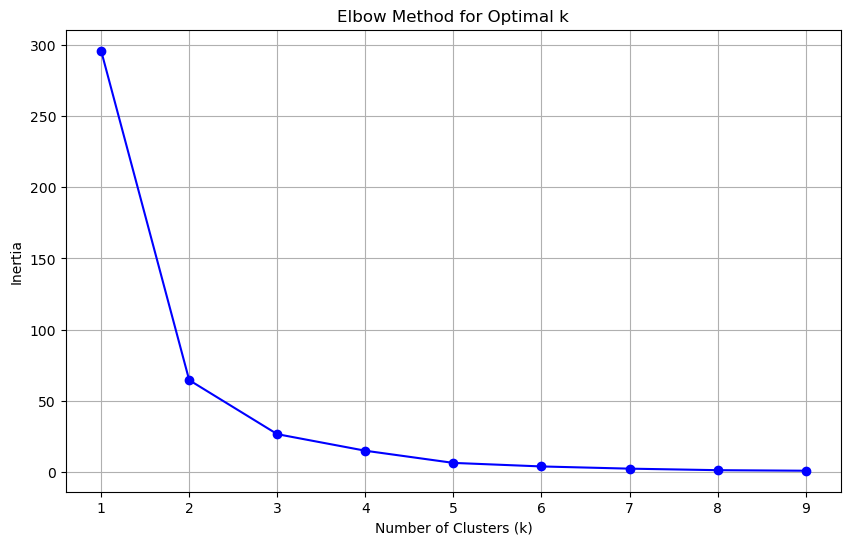

C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Cluster 0 Analysis:
Size: 170
Causes distribution:
Cause
Tree            49
Vehicle         28
Unknown         27
Undetermined    25
Weather          3
Planned          2
Name: count, dtype: int64
Percentage of total: 57.43%

Cluster 1 Analysis:
Size: 126
Causes distribution:
Cause
Equipment           77
Lightning           24
Animal              15
Customer Request     5
Other                4
Customer Caused      1
Name: count, dtype: int64
Percentage of total: 42.57%


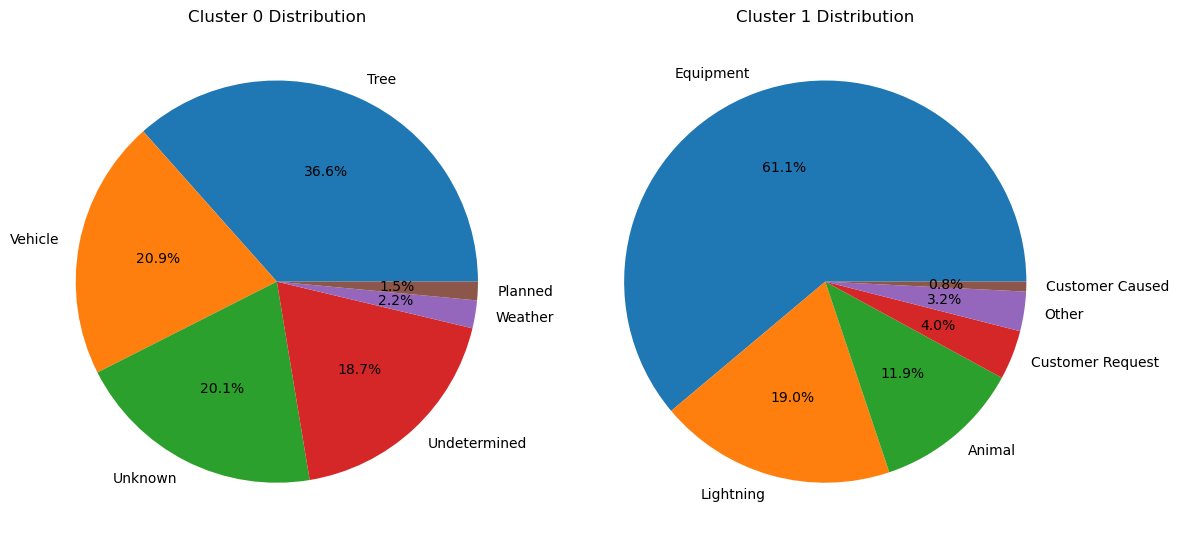

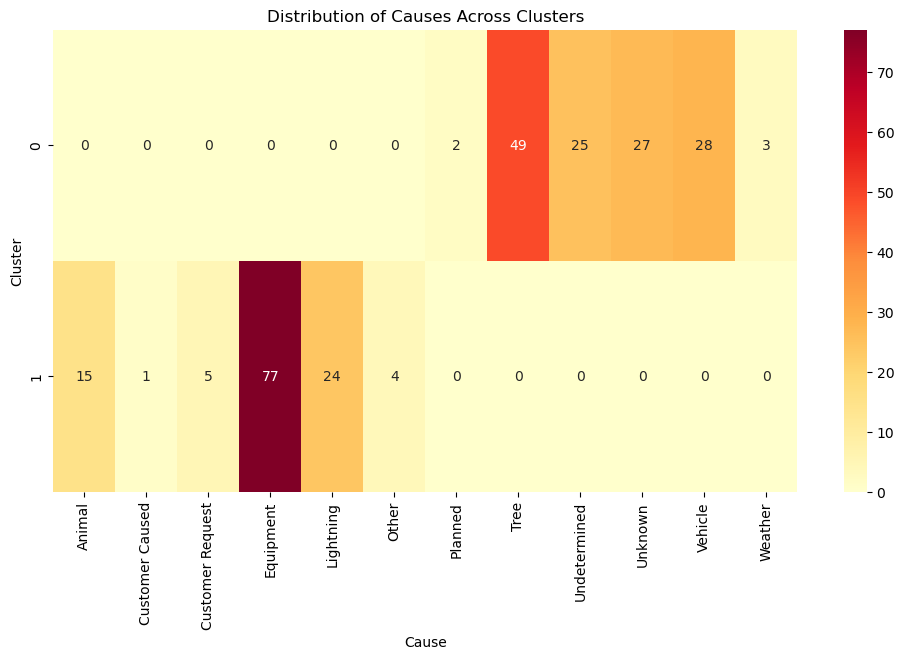

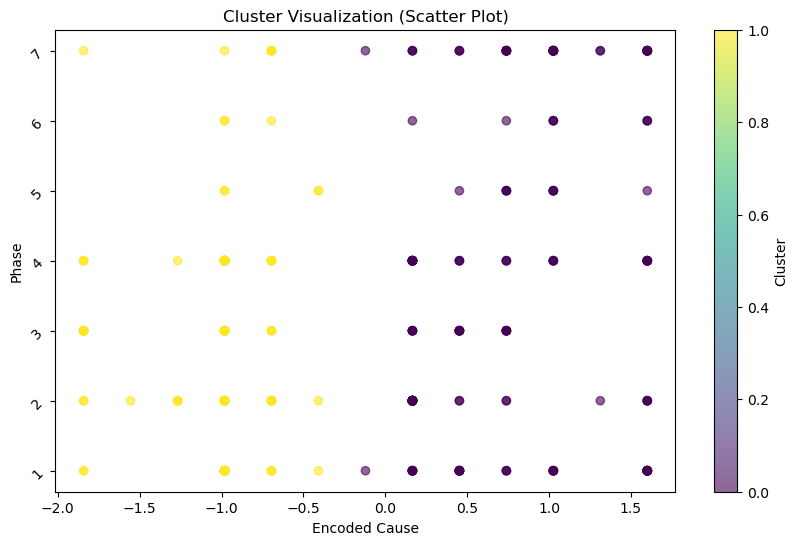


Overall Summary:

Total number of events: 296

Unique causes: 12

Cause distribution across all data:
Cause
Equipment           29.62
Tree                18.85
Vehicle             10.77
Unknown             10.38
Undetermined         9.62
Lightning            9.23
Animal               5.77
Customer Request     1.92
Other                1.54
Weather              1.15
Planned              0.77
Customer Caused      0.38
Name: proportion, dtype: float64


In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Cause' column
# Encode the Cause column
le = LabelEncoder()
cause_encoded = le.fit_transform(data['Cause'])
X = cause_encoded.reshape(-1, 1)
# Scale the encoded values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
inertias = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Perform clustering with optimal k (assuming k=3)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} Analysis:")
    print("Size:", len(cluster_data))
    print("Causes distribution:")
    print(cluster_data['Cause'].value_counts())
    print("Percentage of total:", f"{len(cluster_data)/len(data)*100:.2f}%")

# Visualize the distribution of causes in each cluster
plt.figure(figsize=(12, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    cause_dist = cluster_data['Cause'].value_counts()
    
    plt.subplot(1, optimal_k, cluster + 1)
    plt.pie(cause_dist.values, labels=cause_dist.index, autopct='%1.1f%%')
    plt.title(f'Cluster {cluster} Distribution')

plt.tight_layout()
plt.show()

# Create a heatmap of cause distribution across clusters
cause_cluster_matrix = pd.crosstab(data['Cluster'], data['Cause'])
plt.figure(figsize=(12, 6))
sns.heatmap(cause_cluster_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Distribution of Causes Across Clusters')
plt.xlabel('Cause')
plt.ylabel('Cluster')
plt.show()

# Create a scatter plot for clusters with Phase on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, data['Phase'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Cluster Visualization (Scatter Plot)')
plt.xlabel('Encoded Cause')
plt.ylabel('Phase')
plt.yticks(rotation=45)  # Rotate y-ticks for better visibility
plt.colorbar(label='Cluster')
plt.show()

# Print summary statistics
print("\nOverall Summary:")
print("\nTotal number of events:", len(data))
print("\nUnique causes:", data['Cause'].nunique())
print("\nCause distribution across all data:")
print(data['Cause'].value_counts(normalize=True).multiply(100).round(2))
